In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df_epl = pd.read_excel('C:\\Users\\makar\\.spyder-py3\\Football\\Cleaned_Data\\Premier_League_2017-18.xlsx')

#Add a column - unique ID for each league
#epl_index = np.ones(df_epl.shape[0],dtype=int)
df_epl['league_code'] = 1
df_epl.head()

,id,season/id,season/startDate,season/endDate,season/currentMatchday,utcDate,status,matchday,stage,group,...,score/halfTime/awayTeam,referees/0/id,referees/0/name,referees/1/id,referees/1/name,referees/2/id,referees/2/name,referees/3/id,referees/3/name,league_code
0,205156,23,2017-08-11,2018-05-13,38,2017-08-11T18:45:00Z,FINISHED,1,REGULAR_SEASON,Regular Season,...,2,11575,Mike Dean,11504,Simon Long,11576,Darren Cann,11479,Lee Mason,1
1,205157,23,2017-08-11,2018-05-13,38,2017-08-12T11:30:00Z,FINISHED,1,REGULAR_SEASON,Regular Season,...,1,11580,Anthony Taylor,11581,Gary Beswick,11552,Peter Kirkup,11520,Paul Tierney,1
2,205158,23,2017-08-11,2018-05-13,38,2017-08-12T14:00:00Z,FINISHED,1,REGULAR_SEASON,Regular Season,...,3,11585,Craig Pawson,11586,Richard West,11530,Lee Betts,11479,Lee Mason,1
3,205159,23,2017-08-11,2018-05-13,38,2017-08-12T14:00:00Z,FINISHED,1,REGULAR_SEASON,Regular Season,...,0,11592,Niel Swarbrick,11570,Harry Lennard,11496,Mick McDonough,11287,Oliver Langford,1
4,205160,23,2017-08-11,2018-05-13,38,2017-08-12T14:00:00Z,FINISHED,1,REGULAR_SEASON,Regular Season,...,0,11529,Robert Madley,11531,Marc Perry,11595,Adrian Holmes,11543,Roger East,1


In [27]:
list(df_epl)

['id',
 'season/id',
 'season/startDate',
 'season/endDate',
 'season/currentMatchday',
 'utcDate',
 'status',
 'matchday',
 'stage',
 'group',
 'lastUpdated',
 'homeTeam/id',
 'homeTeam/name',
 'awayTeam/id',
 'awayTeam/name',
 'score/winner',
 'score/duration',
 'score/fullTime/homeTeam',
 'score/fullTime/awayTeam',
 'score/halfTime/homeTeam',
 'score/halfTime/awayTeam',
 'referees/0/id',
 'referees/0/name',
 'referees/1/id',
 'referees/1/name',
 'referees/2/id',
 'referees/2/name',
 'referees/3/id',
 'referees/3/name',
 'league_code']

In [37]:
#Average goals per game:

avg_epl=(df_epl['score/fullTime/homeTeam'].mean() + df_epl['score/fullTime/awayTeam'].mean())/2
print("Premier League matches result in average "+str(round(avg_epl,3))+" goals per game.")

Premier League matches result in average 1.339 goals per game.


In [59]:
#Team that had most goals scored on average in a game:

epl_home = df_epl.groupby('homeTeam/name')['score/fullTime/homeTeam'].mean()
epl_away = df_epl.groupby('awayTeam/name')['score/fullTime/awayTeam'].mean()
#type(epl_away)
epl_top_scoring = epl_home.add(epl_away)
epl_top_scoring = epl_top_scoring/2
epl_top_scoring.sort_values(ascending=False)
#print(epl_home,epl_away,epl_top_scoring)

homeTeam/name
Manchester City FC           2.789474
Liverpool FC                 2.210526
Arsenal FC                   1.947368
Tottenham Hotspur FC         1.947368
Manchester United FC         1.789474
Chelsea FC                   1.631579
Leicester City FC            1.473684
West Ham United FC           1.263158
Crystal Palace FC            1.184211
AFC Bournemouth              1.184211
Everton FC                   1.157895
Watford FC                   1.157895
Newcastle United FC          1.026316
Southampton FC               0.973684
Burnley FC                   0.947368
Stoke City FC                0.921053
Brighton & Hove Albion FC    0.894737
West Bromwich Albion FC      0.815789
Swansea City AFC             0.736842
Huddersfield Town AFC        0.736842
dtype: float64

In [63]:
#Team that had least goals received on average in a game:

epl_home_rec = df_epl.groupby('homeTeam/name')['score/fullTime/awayTeam'].mean()
epl_away_rec = df_epl.groupby('awayTeam/name')['score/fullTime/homeTeam'].mean()

epl_top_receiving = epl_home_rec.add(epl_away_rec)
epl_top_receiving = epl_top_receiving/2
epl_top_receiving.sort_values(ascending=True)

homeTeam/name
Manchester City FC           0.710526
Manchester United FC         0.736842
Tottenham Hotspur FC         0.947368
Liverpool FC                 1.000000
Chelsea FC                   1.000000
Burnley FC                   1.026316
Newcastle United FC          1.236842
Arsenal FC                   1.342105
Brighton & Hove Albion FC    1.421053
Crystal Palace FC            1.447368
Swansea City AFC             1.473684
West Bromwich Albion FC      1.473684
Southampton FC               1.473684
Everton FC                   1.526316
Huddersfield Town AFC        1.526316
Leicester City FC            1.578947
AFC Bournemouth              1.605263
Watford FC                   1.684211
Stoke City FC                1.789474
West Ham United FC           1.789474
dtype: float64

In [67]:
#Teams involved in most goals per game (for+against):

epl_top_overall = epl_top_receiving.add(epl_top_scoring)
epl_top_overall.sort_values(ascending=False)

homeTeam/name
Manchester City FC           3.500000
Arsenal FC                   3.289474
Liverpool FC                 3.210526
Leicester City FC            3.052632
West Ham United FC           3.052632
Tottenham Hotspur FC         2.894737
Watford FC                   2.842105
AFC Bournemouth              2.789474
Stoke City FC                2.710526
Everton FC                   2.684211
Chelsea FC                   2.631579
Crystal Palace FC            2.631579
Manchester United FC         2.526316
Southampton FC               2.447368
Brighton & Hove Albion FC    2.315789
West Bromwich Albion FC      2.289474
Newcastle United FC          2.263158
Huddersfield Town AFC        2.263158
Swansea City AFC             2.210526
Burnley FC                   1.973684
dtype: float64

In [90]:
#Games, that ended with over 1.5 goals
df_epl['over_1.5'] = np.where(df_epl['score/fullTime/homeTeam']+df_epl['score/fullTime/awayTeam']>1,1,0)

#Teams with highest % of games over 1.5
epl_games_over_h = df_epl.groupby('homeTeam/name')['over_1.5'].mean()
epl_games_over_a = df_epl.groupby('awayTeam/name')['over_1.5'].mean()
epl_games_over = (epl_games_over_h.add(epl_games_over_a))/2
epl_games_over = epl_games_over.sort_values(ascending=False)
epl_games_over

homeTeam/name
Leicester City FC            0.894737
West Ham United FC           0.868421
Manchester City FC           0.842105
Arsenal FC                   0.815789
Liverpool FC                 0.815789
Stoke City FC                0.789474
Tottenham Hotspur FC         0.789474
Everton FC                   0.789474
AFC Bournemouth              0.789474
Huddersfield Town AFC        0.736842
Brighton & Hove Albion FC    0.736842
Watford FC                   0.736842
Crystal Palace FC            0.710526
Southampton FC               0.684211
Chelsea FC                   0.684211
Manchester United FC         0.657895
West Bromwich Albion FC      0.657895
Swansea City AFC             0.631579
Newcastle United FC          0.578947
Burnley FC                   0.578947
Name: over_1.5, dtype: float64

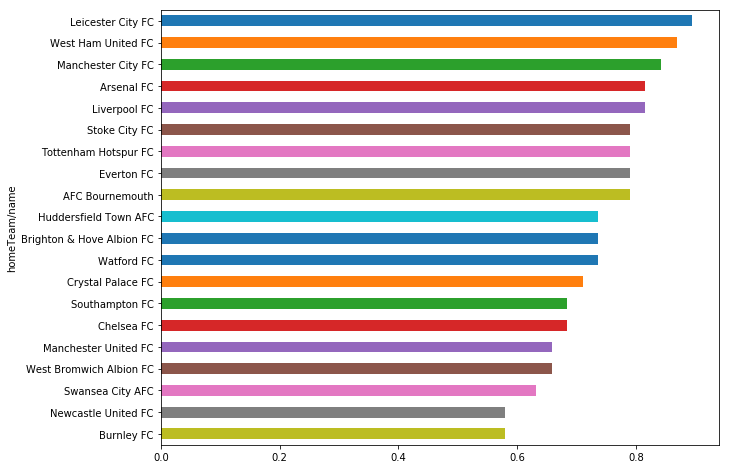

In [101]:
epl_games_over.plot(kind='barh',figsize=(10,8))
plt.gca().invert_yaxis()
plt.show()